
### Mercedes-Benz Greener Manufacturing
Can you cut the time a Mercedes-Benz spends on the test bench?

* https://www.kaggle.com/c/mercedes-benz-greener-manufacturing


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
base_path = "data"
train = pd.read_csv(f'{base_path}/train.csv.zip', index_col="ID")
test = pd.read_csv(f'{base_path}/test.csv.zip', index_col="ID")
submission = pd.read_csv(f'{base_path}/sample_submission.csv.zip', index_col="ID")

In [3]:
train.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,,,,,,,,,,,,,,,,,,,,,
0,130.81,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
6,88.53,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
7,76.26,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
9,80.62,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
13,78.02,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,,,,,,,,,,,,,,,,,,,,,
1,az,v,n,f,d,t,a,w,0,0,...,0,0,0,1,0,0,0,0,0,0
2,t,b,ai,a,d,b,g,y,0,0,...,0,0,1,0,0,0,0,0,0,0
3,az,v,as,f,d,a,j,j,0,0,...,0,0,0,1,0,0,0,0,0,0
4,az,l,n,f,d,z,l,n,0,0,...,0,0,0,1,0,0,0,0,0,0
5,w,s,as,c,d,y,i,m,0,0,...,1,0,0,0,0,0,0,0,0,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4209 entries, 0 to 8417
Columns: 377 entries, y to X385
dtypes: float64(1), int64(368), object(8)
memory usage: 12.1+ MB


In [6]:
train.isnull().sum().sum()

0

In [7]:
train.describe()

,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,0.007840,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,0.088208,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
num_desc = train.drop(columns="y").describe()
num_desc

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,0.007840,0.099549,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,0.088208,0.299433,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
num_desc.loc["min"].describe()

count    368.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: min, dtype: float64

In [10]:
num_desc.loc["max"].describe()

count    368.000000
mean       0.967391
std        0.177852
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: max, dtype: float64

In [11]:
corr = train.select_dtypes(include="number").corr()
corr

,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
y,1.000000,-0.026985,NaN,0.089792,0.048276,0.193643,0.023116,0.048946,-0.159815,-0.001789,...,0.029100,0.114005,0.061403,-0.258679,0.067919,0.040932,-0.159815,0.040291,-0.004591,-0.022280
X10,-0.026985,1.000000,NaN,-0.033084,-0.028806,-0.100474,-0.002532,-0.005944,-0.010164,-0.010323,...,0.165277,-0.028618,-0.074244,-0.016870,-0.011374,-0.010479,-0.010164,-0.004740,-0.002532,-0.004387
X11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X12,0.089792,-0.033084,NaN,1.000000,0.214825,-0.246513,-0.006212,-0.014584,-0.024937,-0.025327,...,-0.107864,-0.070214,0.030134,-0.016043,-0.027907,-0.005566,-0.024937,-0.011628,-0.006212,-0.010765
X13,0.048276,-0.028806,NaN,0.214825,1.000000,-0.083141,-0.005409,-0.012698,-0.021713,-0.010525,...,-0.169721,-0.061136,0.357229,-0.036040,-0.024299,0.023045,-0.021713,-0.010125,0.041242,-0.009373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X380,0.040932,-0.010479,NaN,-0.005566,0.023045,0.007743,-0.001968,-0.004619,-0.007899,-0.008022,...,-0.061741,-0.022240,-0.061168,-0.013110,-0.008839,1.000000,-0.007899,-0.003683,-0.001968,-0.003410
X382,-0.159815,-0.010164,NaN,-0.024937,-0.021713,0.012713,-0.001908,-0.004480,1.000000,0.085256,...,-0.059883,-0.021571,-0.059327,-0.012716,-0.008573,-0.007899,1.000000,-0.003572,-0.001908,-0.003307
X383,0.040291,-0.004740,NaN,-0.011628,-0.010125,0.023604,-0.000890,-0.002089,-0.003572,0.062481,...,-0.015413,-0.010059,0.035107,-0.005930,-0.003998,-0.003683,-0.003572,1.000000,-0.000890,-0.001542
X384,-0.004591,-0.002532,NaN,-0.006212,0.041242,0.025199,-0.000475,-0.001116,-0.001908,-0.001938,...,-0.014917,-0.005373,0.008694,-0.003168,-0.002136,-0.001968,-0.001908,-0.000890,1.000000,-0.000824


<AxesSubplot: >

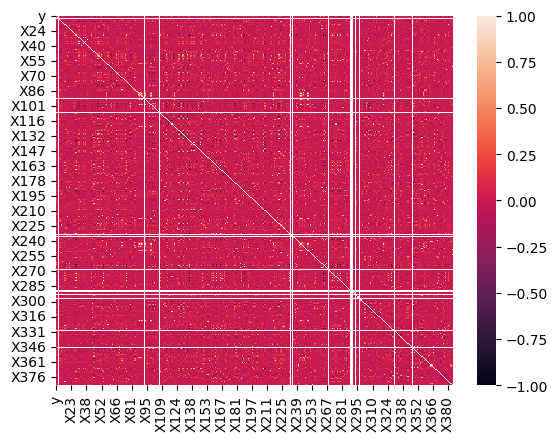

In [13]:
sns.heatmap(corr)

In [19]:
label_name = "y"

X_train = train.drop(columns=label_name)
y_train = train[label_name]
X_test = test

X_train.shape, y_train.shape, X_test.shape

((4209, 376), (4209,), (4209, 376))

In [14]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model

ExtraTreesRegressor()